   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

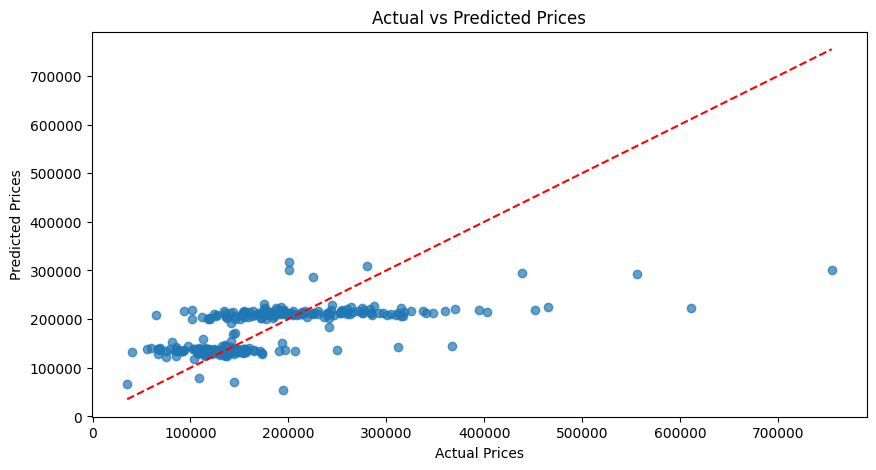

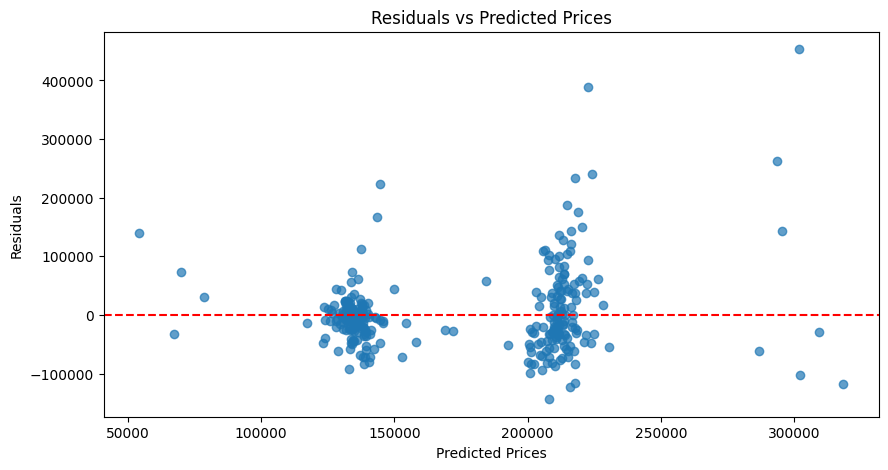

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Inspect the data
print(train_data.head())
print(test_data.head())

# Preprocess the data if needed (e.g., handle missing values)
# Using 'LotArea', 'BedroomAbvGr', 'FullBath' for simplicity
train_data.dropna(subset=['LotArea', 'BedroomAbvGr', 'FullBath', 'SalePrice'], inplace=True)
test_data.dropna(subset=['LotArea', 'BedroomAbvGr', 'FullBath'], inplace=True)

# Features and target variable
X = train_data[['LotArea', 'BedroomAbvGr', 'FullBath']]
y = train_data['SalePrice']

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
variance = y_val.var()
mse_percentage = 1 - (1 - mse / variance)
print(f'Mean Squared Error Percentage on validation set: {mse_percentage * 100:.2f}%')
r_squared = model.score(X_val, y_val)
print(f'R-squared on validation set: {r_squared}')
# Prepare the test data
X_test = test_data[['LotArea', 'BedroomAbvGr', 'FullBath']]

# Make predictions on the test data
test_data['predicted_price'] = model.predict(X_test)

# Save the predictions to a CSV file
test_data[['Id', 'predicted_price']].to_csv('test_predictions.csv', index=False)

print('Predictions saved to test_predictions.csv')

# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.scatter(y_val, y_val_pred, alpha=0.7)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Plot residuals
residuals = y_val - y_val_pred
plt.figure(figsize=(10, 5))
plt.scatter(y_val_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()
